In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [42]:
poligono = gpd.read_file('./data/poligono')

ed_actual = gpd.read_parquet('./data/legotizacion_set/actual_buildings.parquet')
ed_future = gpd.read_parquet('./data/legotizacion_set/future_buildings.parquet')

grid = gpd.read_file('./data/cuadricula')
curvas = gpd.read_file('./data/Maqueta')

In [43]:
ed_actual.dropna(subset=['geometry'], inplace=True)
ed_future.dropna(subset=['geometry'], inplace=True)

ed_actual.drop_duplicates(subset=['geometry'], inplace=True)
ed_future.drop_duplicates(subset=['geometry'], inplace=True)

In [44]:
# Empaquetar los gdfs
gdfs = {
    'ed_actual': ed_actual,
    'ed_future': ed_future,
    'poligono': poligono,
    'curvas': curvas,
    'grid': grid,
}

# Arreglar los que tengan geometrias invalidas
def fix_gdf(gdf):
    invalid_geometries = gdf[~gdf.geometry.is_valid]
    if(len(invalid_geometries) > 0):
        gdf['geometry'] = gdf.geometry.buffer(0)
        return gdf[gdf.geometry.is_valid]
    else:
        return gdf

for key, gdf in gdfs.items():
    gdfs[key] = fix_gdf(gdf)

# Recortar datos según el poligono
cut_data = ['ed_actual', 'ed_future']

for key in cut_data:
    gdfs[key] = gpd.overlay(gdfs[key], gdfs['poligono'], how='intersection')

<Axes: >

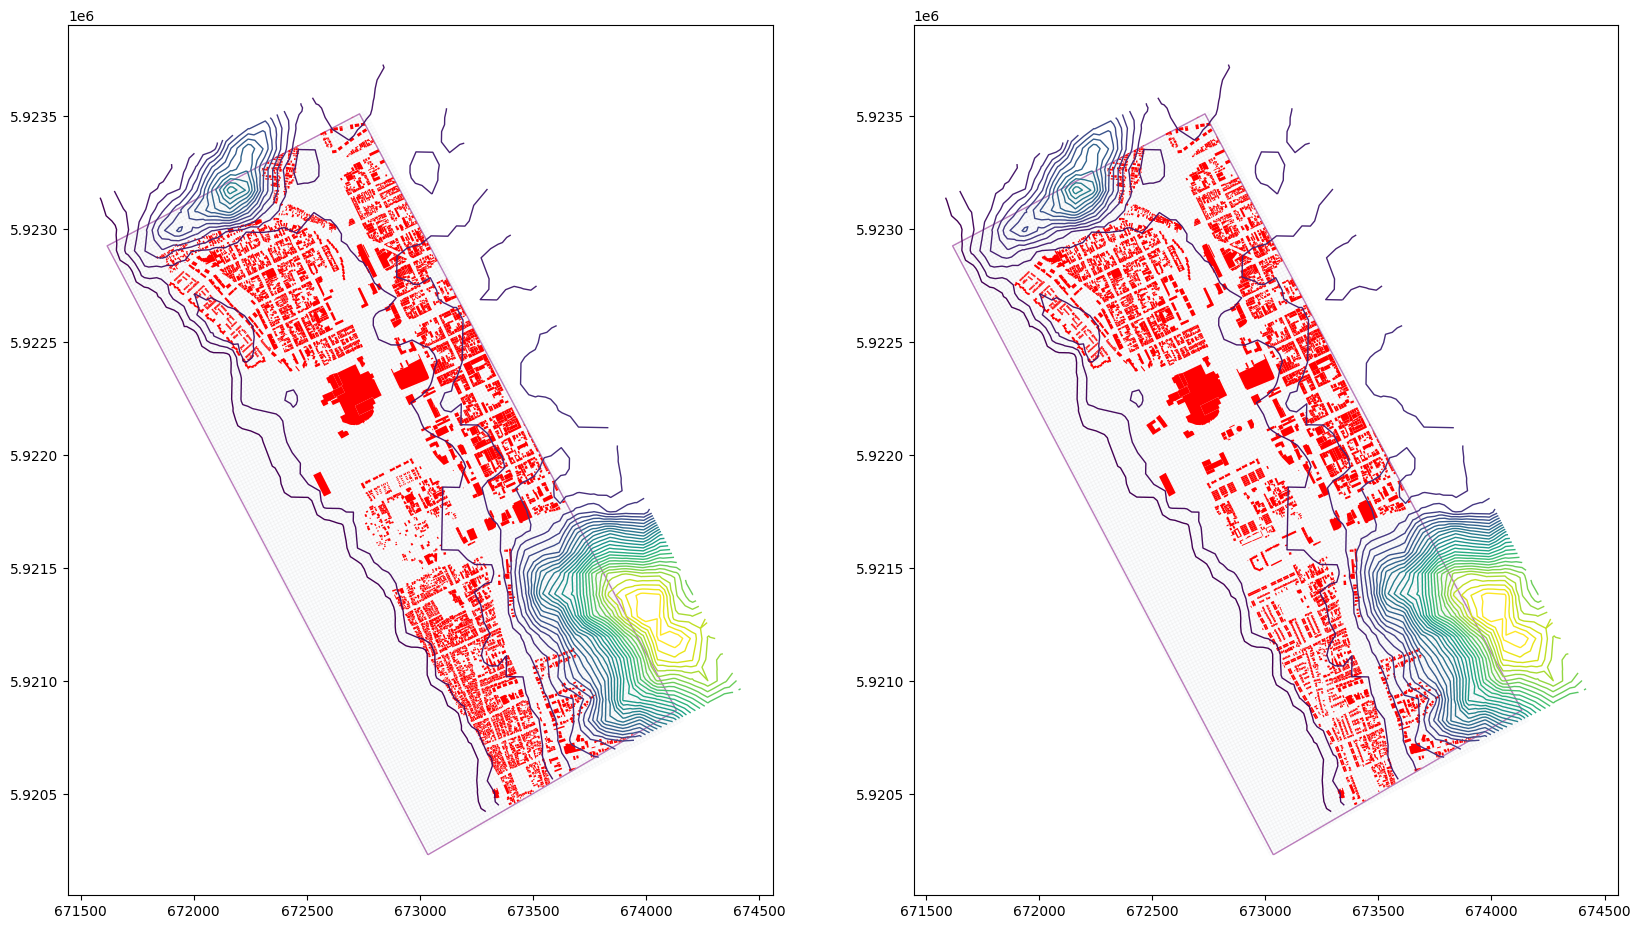

In [45]:
fig, ax = plt.subplots(1,2, figsize=(20,40))
gdfs['poligono'].plot(ax=ax[0], edgecolor='purple', color='white', alpha=0.5)
gdfs['grid'].plot(ax=ax[0], edgecolor='black', linewidth=1, alpha=0.01)
gdfs['curvas'].plot(ax=ax[0], column='CONTOUR', linewidth=1)
gdfs['ed_actual'].plot(ax=ax[0], color='red')

gdfs['poligono'].plot(ax=ax[1], edgecolor='purple', color='white', alpha=0.5)
gdfs['grid'].plot(ax=ax[1], edgecolor='black', linewidth=1, alpha=0.01)
gdfs['curvas'].plot(ax=ax[1], column='CONTOUR', linewidth=1)
gdfs['ed_future'].plot(ax=ax[1], color='red')

In [48]:
[gdf.to_parquet(f'./data/LEGOTIZATION/{key}.parquet') for key, gdf in gdfs.items()];

In [55]:
from glob import glob
import os

def load_data(path='./data/LEGOTIZATION'):
    desired_crs = 'EPSG:32718'
    files = glob(os.path.join(f'{path}', '*.parquet'))
    gdfs = {}
    for filename in files:
        gdf = gpd.read_parquet(filename).to_crs(desired_crs)
        name = os.path.split(filename)[-1].replace('.parquet', '')
        gdfs[name] = gdf
    return gdfs
data = load_data()

In [65]:
gdfs.keys()

dict_keys(['ed_actual', 'ed_future', 'poligono', 'curvas', 'grid'])